<a href="https://colab.research.google.com/github/Vaishnavishrivastav/Electric-Vehicle/blob/main/ExpiryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
df = pd.read_csv('/content/FoodKeeper-Data.csv', encoding='ISO-8859-1')

In [8]:
with open('/content/FoodKeeper-Data.csv', 'r', encoding='ISO-8859-1') as f:
    for _ in range(10):
        print(f.readline())


ID,Category_ID,Name,Name_subtitle,Keywords,Pantry_Min,Pantry_Max,Pantry_Metric,Pantry_tips,DOP_Pantry_Min,DOP_Pantry_Max,DOP_Pantry_Metric,DOP_Pantry_tips,Pantry_After_Opening_Min,Pantry_After_Opening_Max,Pantry_After_Opening_Metric,Refrigerate_Min,Refrigerate_Max,Refrigerate_Metric,Refrigerate_tips,DOP_Refrigerate_Min,DOP_Refrigerate_Max,DOP_Refrigerate_Metric,DOP_Refrigerate_tips,Refrigerate_After_Opening_Min,Refrigerate_After_Opening_Max,Refrigerate_After_Opening_Metric,Refrigerate_After_Thawing_Min,Refrigerate_After_Thawing_Max,Refrigerate_After_Thawing_Metric,Freeze_Min,Freeze_Max,Freeze_Metric,Freeze_Tips,DOP_Freeze_Min,DOP_Freeze_Max,DOP_Freeze_Metric,DOP_Freeze_Tips,,,,,,,,

1,7,Butter,,Butter,,,,May be left at room temperature for 1 - 2 days.,,,,,,,,,,,,1,2,Months,,,,,,,,,,,,6,9,Months,,,,,,,,,

2,7,Buttermilk,,Buttermilk,,,,,,,,,,,,,,,,1,2,Weeks,,,,,,,,,,,,3,3,Months,,,,,,,,,

3,7,Cheese,"hard such as cheddar, swiss, block parmesan","Cheese,cheddar, swiss,parmesan",,,,,,,,,,,

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/FoodKeeper-Data.csv', encoding='ISO-8859-1')

df.head()


,ID,Category_ID,Name,Name_subtitle,Keywords,Pantry_Min,Pantry_Max,Pantry_Metric,Pantry_tips,DOP_Pantry_Min,...,DOP_Freeze_Metric,DOP_Freeze_Tips,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,1.0,7.0,Butter,NaN,Butter,NaN,NaN,NaN,May be left at room temperature for 1 - 2 days.,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,7.0,Buttermilk,NaN,Buttermilk,NaN,NaN,NaN,NaN,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,7.0,Cheese,"hard such as cheddar, swiss, block parmesan","Cheese,cheddar, swiss,parmesan",NaN,NaN,NaN,NaN,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,7.0,Cheese,parmesan; shredded or grated,"Cheese,parmesan,shredded,grated",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,7.0,Cheese,"shredded; cheddar, mozzarella, etc.","Cheese,shredded,cheddar,mozzarella",NaN,NaN,NaN,NaN,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:

columns = [
    'Name',
    'Pantry_Min', 'Pantry_Max', 'Pantry_Metric',
    'Refrigerate_Min', 'Refrigerate_Max', 'Refrigerate_Metric',
    'Freeze_Min', 'Freeze_Max', 'Freeze_Metric'
]

df_small = df[columns].copy()

for col in ['Pantry_Min', 'Pantry_Max', 'Refrigerate_Min', 'Refrigerate_Max', 'Freeze_Min', 'Freeze_Max']:
    df_small[col] = pd.to_numeric(df_small[col], errors='coerce')

df_small.dropna(subset=['Pantry_Min', 'Refrigerate_Min', 'Freeze_Min'], how='all', inplace=True)

df_small.head()


,Name,Pantry_Min,Pantry_Max,Pantry_Metric,Refrigerate_Min,Refrigerate_Max,Refrigerate_Metric,Freeze_Min,Freeze_Max,Freeze_Metric
11,Cream,NaN,NaN,NaN,1.0,1.0,Days,1.0,2.0,Months
19,Eggs,NaN,NaN,NaN,2.0,4.0,Days,12.0,12.0,Months
20,Eggs,NaN,NaN,NaN,1.0,1.0,Weeks,NaN,NaN,Not Recommended
21,Egg dishes,NaN,NaN,NaN,3.0,4.0,Days,2.0,3.0,Months
29,Whipped topping,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,Months


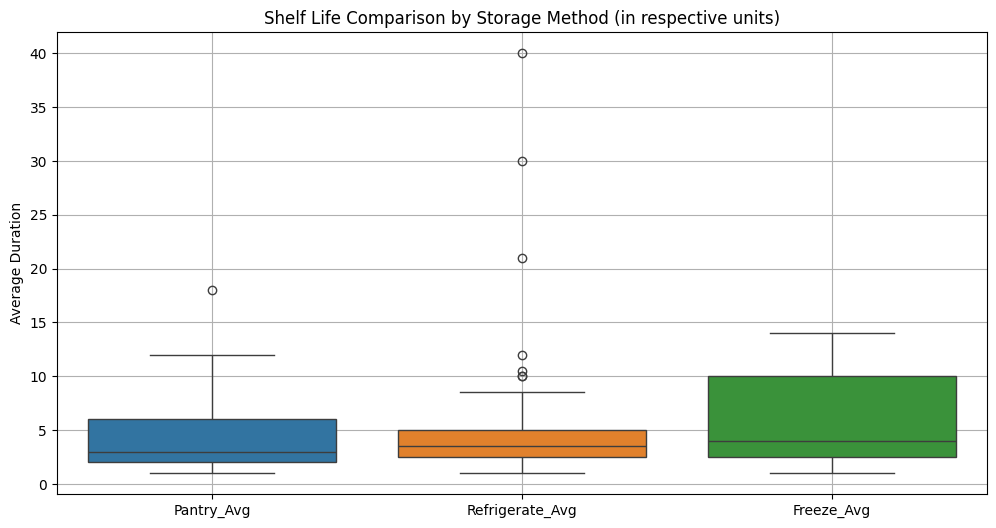

In [11]:

df_small['Pantry_Avg'] = df_small[['Pantry_Min', 'Pantry_Max']].mean(axis=1)
df_small['Refrigerate_Avg'] = df_small[['Refrigerate_Min', 'Refrigerate_Max']].mean(axis=1)
df_small['Freeze_Avg'] = df_small[['Freeze_Min', 'Freeze_Max']].mean(axis=1)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_small[['Pantry_Avg', 'Refrigerate_Avg', 'Freeze_Avg']])
plt.title('Shelf Life Comparison by Storage Method (in respective units)')
plt.ylabel('Average Duration')
plt.grid(True)
plt.show()


In [12]:
def predict_expiry(product_name, storage_type='Refrigerate'):
    row = df_small[df_small['Name'].str.lower().str.contains(product_name.lower())]
    if row.empty:
        return "Product not found."

    min_col = f"{storage_type}_Min"
    max_col = f"{storage_type}_Max"
    metric_col = f"{storage_type}_Metric"

    min_val = row[min_col].values[0]
    max_val = row[max_col].values[0]
    unit = row[metric_col].values[0]

    if pd.isna(min_val) or pd.isna(max_val):
        return f"No data available for {storage_type.lower()} storage."

    return f"Estimated shelf life of {product_name.title()} in {storage_type.lower()} storage: {int(min_val)}–{int(max_val)} {unit}"

predict_expiry('cheese', 'Freeze')


'Estimated shelf life of Cheese in freeze storage: 4–4 Months'